In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


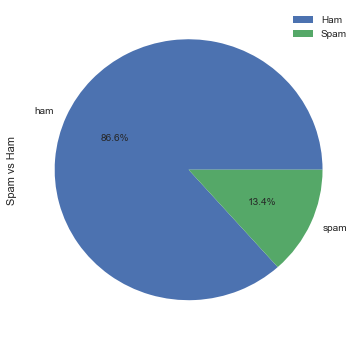

In [5]:
df['v1'].value_counts().plot(kind="pie", figsize=(6, 6) , autopct="%.1f%%")
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [6]:
top_messages = df.groupby("v2")["v1"].agg([len, np.max]).sort_values( by= 'len', ascending=False).head(10)
'''I grouped all messages and created a len column in witch with amax I have its category and then I just sorted  by len
 how many times it is repeated'''
top_messages

,len,amax
v2,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [7]:
spam_messages = df[df['v1'] == "spam"]["v2"]
#Give me all the messages where the category is spam

spam_words = []

def extractSpamWords(spam_messages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spam_messages) if word.lower()
             not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words

#Basically extractSpamWord takes the list spam_words and take every single word in the messages and add them into spam_words
spam_messages.apply(extractSpamWords)

print("")

In [8]:
from wordcloud import WordCloud

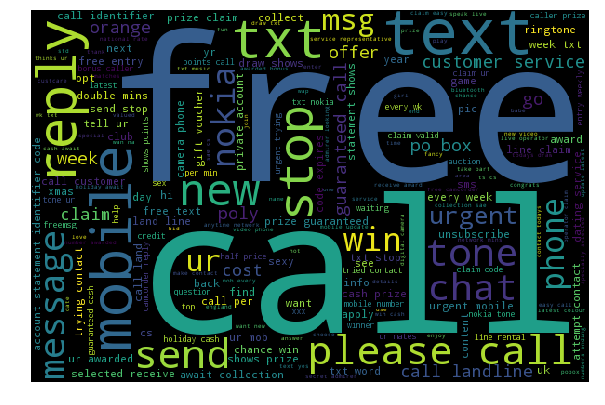

In [9]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8))
plt.axis("off") #Delete lines in the image
plt.imshow(spam_wordcloud)
plt.show()

In [10]:
spam_words = np.array(spam_words) 
#Change the list into a numpy array and then count every word, how many time it is repeated and then list the most repe
print("Top 5 Spam words")
pd.Series(spam_words).value_counts().head(5)

Top 5 Spam words


call    346
free    217
txt     156
u       144
ur      144
dtype: int64

In [11]:
df["MessageLength"] = df["v2"].apply(len) #Calculate the lenght of every message including the ham
df["MessageLength"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: MessageLength, dtype: float64

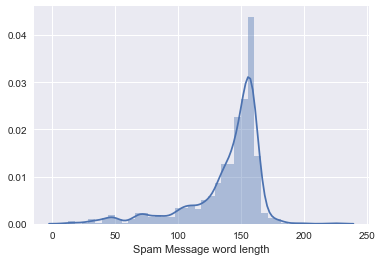

In [12]:
ax = sns.distplot(df[df['v1']=='spam']['MessageLength'])
ax.set_xlabel("Spam Message word length")

With the infromation in the distplot and the WordCloud we found witch are the most used words in a spam message and witch is the average number of words inside it